In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cm

### Import data

In [2]:
sss150_rivers = xr.open_dataset('/results/forcing/rivers/sss150/R_sss150_Dailies_y2023m02d25.nc')
sss150_rivers26Feb = xr.open_dataset('/results/forcing/rivers/sss150/R_sss150_Dailies_y2023m02d26.nc')
ssc_rivers = xr.open_dataset('/results/forcing/rivers/R202108Dailies_y2023m02d25.nc')
ssc_rivers26Feb = xr.open_dataset('/results/forcing/rivers/R202108Dailies_y2023m02d26.nc')

In [41]:
sss150_rivers
ssc_rivers

<xarray.Dataset>
Dimensions:       (x: 398, y: 898, time_counter: 1)
Coordinates:
  * x             (x) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * y             (y) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * time_counter  (time_counter) int64 0
Data variables:
    rorunoff      (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    acknowledgements:      Based on river fit
    creator_email:         sallen@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Contributors
    creator_url:           https://salishsea-meopar-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    title:                 Rivers for y2023m02d25
    notebook:              MakeDailyRiverNCfiles.ipynb
    rivers_base:           river_202108
    summary:               Daily Runoff for Bathymetry 202108
    history:               [2023-03-26] File creation.

In [3]:
# Import mesh data
mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
tmask = 1 - mesh.tmask[0]
umask = 1 - mesh.umask[0]
vmask = 1 - mesh.vmask[0]

sss_GridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_T.nc')
ssc_gridT = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/25feb23/SalishSea_1h_20230225_20230225_grid_T.nc')
mesh_ssc = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/OAE/sss150/mesh_mask201702MD.nc')

### Find sss150 subset in Howe Sound

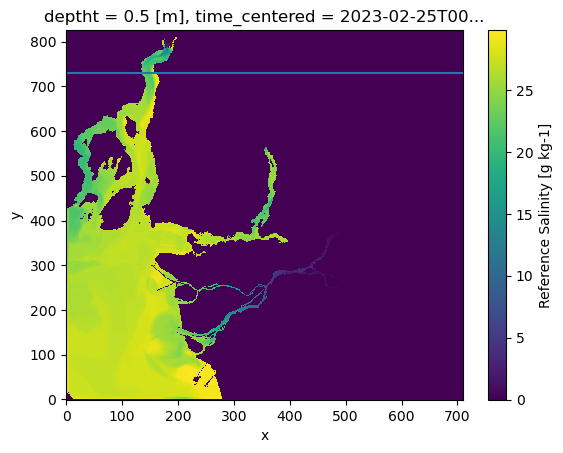

In [4]:
sss_GridT.vosaline[0,0].plot()
plt.axhline(730)

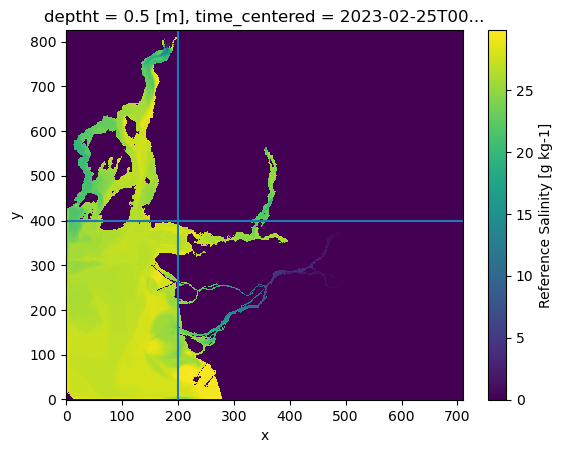

In [5]:
sss_GridT.vosaline[0,0].plot()
plt.axhline(400)
plt.axvline(200)

### Subset ssc in Howe Sound

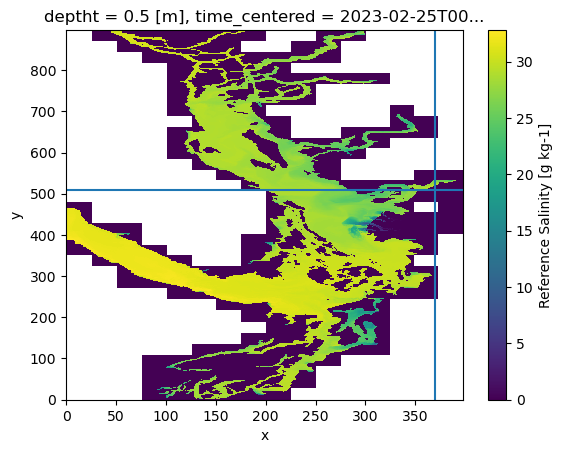

In [9]:
ssc_gridT.vosaline[0,0].plot()
plt.axhline(510)
plt.axvline(370)

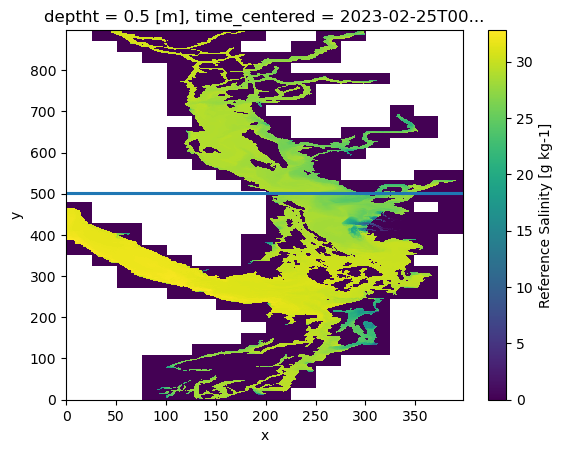

In [13]:
ssc_gridT.vosaline[0,0].plot()
plt.axhline(499)
# plt.axvline(393)
plt.axhline(501)


(300.0, 397.5)

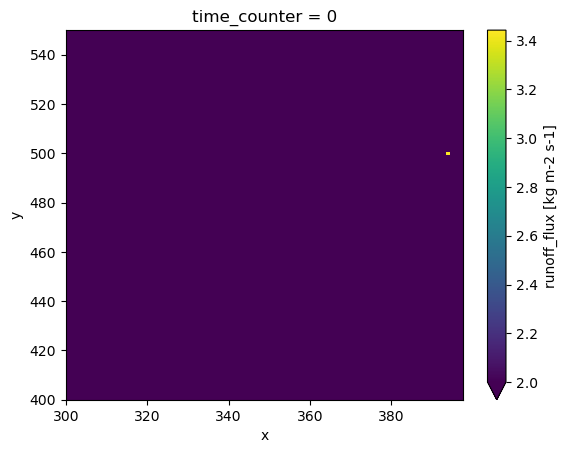

In [15]:
ssc_rivers.rorunoff[0].plot(vmin=2)
plt.ylim(400,550)
plt.xlim(300)

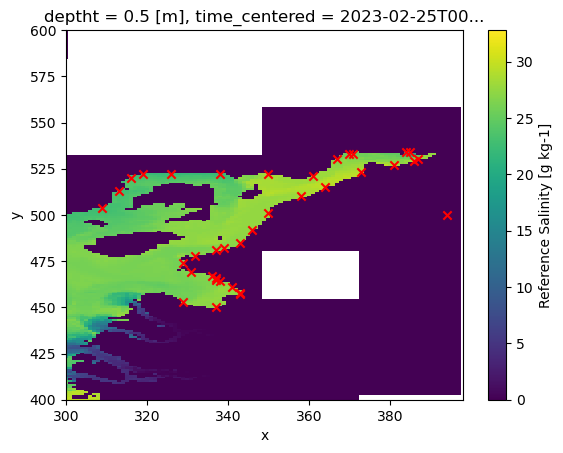

In [36]:
idxY,idxX = np.where(ssc_rivers.rorunoff[0] != 0)

ssc_gridT.vosaline[0,0].plot()
plt.xlim(300,398)
plt.ylim(400,600)

for ii in range(len(idxX)):
    plt.scatter(idxX[ii],idxY[ii],marker='x',color='red')

Text(0.5, 1.0, 'sss150')

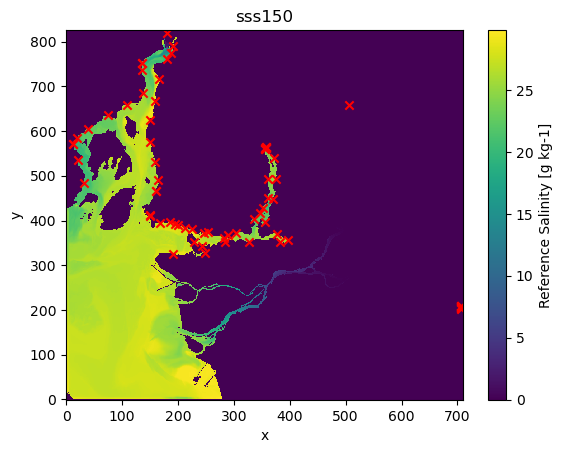

In [34]:
idxY,idxX = np.where(sss150_rivers.rorunoff[0] != 0)

sss_GridT.vosaline[0,0].plot()

for ii in range(len(idxX)):
    plt.scatter(idxX[ii],idxY[ii],marker='x',color='red')
    
plt.title('sss150')

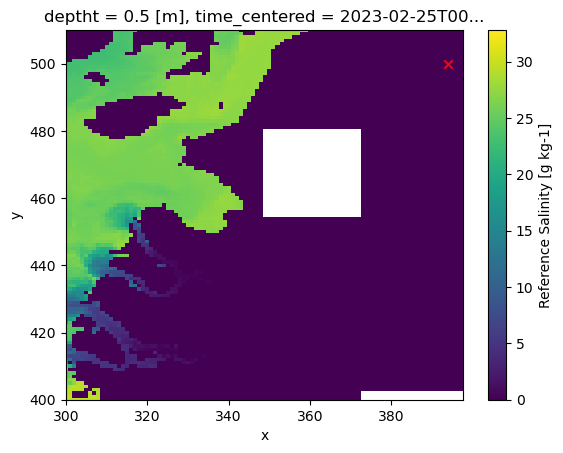

In [16]:
ssc_gridT.vosaline[0,0].plot()
# plt.axhline(499)
# plt.axvline(393)
# plt.axhline(501)
plt.ylim(400,510)
plt.xlim(300)
plt.scatter(394,500,marker='x',color='r')

In [ ]:
sss_FilteredData = sss150_rivers.where((sss150_rivers.y > 730) & (sss150_rivers.rorunoff != 0), drop=True)

sss_HSRunoff = np.nansum(sss_FilteredData.rorunoff[0])
print(sss_HSRunoff)

In [45]:
sss_FilteredData2 = sss150_rivers.where((sss150_rivers.y > 400) & (sss150_rivers.rorunoff != 0) & (sss150_rivers.x < 200), drop=True)

sss_HSRunoff2 = np.nansum(sss_FilteredData2.rorunoff[0])
print(sss_HSRunoff2)

5.2699583210272785


In [46]:
sss_FilteredData26Feb = sss150_rivers26Feb.where((sss150_rivers26Feb.y > 730) & (sss150_rivers26Feb.rorunoff != 0), drop=True)

sss_HSRunoff26Feb = np.nansum(sss_FilteredData26Feb.rorunoff[0])
print(sss_HSRunoff26Feb)

4.728087592955838


In [44]:
ssc_FilteredData = ssc_rivers.where((ssc_rivers.x > 370) & (ssc_rivers.y > 520)  & (ssc_rivers.rorunoff != 0), drop=True)

ssc_HSRunoff = np.nansum(ssc_FilteredData.rorunoff[0])
print(ssc_HSRunoff)

0.26466925381544176


In [ ]:
ssc_FilteredData2 = ssc_rivers.where((ssc_rivers.x > 393) & (ssc_rivers.y > 490) & (ssc_rivers.y < 510)  & (ssc_rivers.rorunoff != 0), drop=True)

ssc_HSRunoff2 = np.nansum(ssc_FilteredData2.rorunoff[0])
print(ssc_HSRunoff2)

3.4425345290125455


In [19]:
ssc_FilteredData26Feb = ssc_rivers26Feb.where((ssc_rivers26Feb.x > 370) & (ssc_rivers26Feb.y > 520)  & (ssc_rivers26Feb.rorunoff != 0), drop=True)

ssc_HSRunoff26Feb = np.nansum(ssc_FilteredData26Feb.rorunoff[0])
print(ssc_HSRunoff26Feb)

0.268187362217765


### Find grid resolution

In [20]:
ssc_Xres = np.mean(mesh_ssc.e1t.values)
ssc_Yres = np.mean(mesh_ssc.e2t.values)

np.mean(mesh_ssc.e2t.values),np.mean(mesh_ssc.e1t.values)

(499.16805188809377, 433.77631301501225)

In [21]:
sss_Xres = np.mean(mesh.e1t.values)
sss_Yres = np.mean(mesh.e2t.values)

np.mean(mesh.e2t.values),np.mean(mesh.e1t.values)

(99.32817907706675, 129.55957310341498)

### Compare sss150 to ssc river data

In [39]:
print('sss150 (Feb25):',sss_HSRunoff*sss_Xres*sss_Yres,'kg/s')
print('sss150 (Feb26):',sss_HSRunoff26Feb*sss_Xres*sss_Yres,'kg/s')
print('ssc (Feb25)',ssc_HSRunoff*ssc_Xres*ssc_Yres,'kg/s')
print('ssc (Feb26)',ssc_HSRunoff26Feb*ssc_Xres*ssc_Yres,'kg/s')

# print('sss150 (All HoweSound):',sss_HSRunoff2*sss_Xres*sss_Yres,'kg/s')
# print('ssc (AllHoweSound)',ssc_HSRunoff2*ssc_Xres*ssc_Yres,'kg/s')

sss150 (Feb25): 60485.27915127258 kg/s
sss150 (Feb26): 60845.36433613928 kg/s
ssc (Feb25) 57308.11286680828 kg/s
ssc (Feb26) 58069.87929978654 kg/s
